In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import urllib
import requests

DATA_PATH = 'dataset'

URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data'
urllib.request.urlretrieve(URL, "yeast.csv")

def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)

def replaceString():          
    # Read in the file
    with open('dataset/yeast.data', 'r') as file :
      filedata = file.read()

    # Replace the target string
    filedata = filedata.replace('  ', ' ')

    # Write the file out again
    with open('dataset/yeast.data', 'w') as file:
      file.write(filedata)
            

urls = ['http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data',
        'http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.name']

In [26]:
replaceString()

In [27]:
load_dataset('data', urls)
columns = ['SequenceName','mcg','gah','alm','mit','erl','pox','vac','nun' ,'Name']
df = pd.read_csv('dataset/yeast.data', names=columns, sep=' ', na_values='?')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     SequenceName   mcg   gah   alm   mit  erl   pox   vac   nun Name
0      ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.00  0.48  0.22  MIT
1      ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.00  0.53  0.22  MIT
2      ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.00  0.53  0.22  MIT
3      AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.00  0.54  0.22  NUC
4      AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.00  0.48  0.22  MIT
5      AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.50  0.49  0.22  CYT
6      ABC1_YEAST  0.50  0.54  0.48  0.65  0.5  0.00  0.53  0.22  MIT
7      BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.00  0.58  0.34  NUC
8      ABF2_YEAST  0.55  0.50  0.66  0.36  0.5  0.00  0.49  0.22  MIT
9      ABP1_YEAST  0.40  0.39  0.60  0.15  0.5  0.00  0.58  0.30  CYT
10     ACE1_YEAST  0.43  0.39  0.54  0.21  0.5  0.00  0.53  0.27  NUC
11     ACE2_YEAST  0.42  0.37  0.59  0.20  0.5  0.00  0.52  0.29  NUC
12     ACH1_YEAST  0.40  0.42  0.57  0.35  0.5  0.00  0.53  0.25  CYT
13     ACON_YEAST  0

In [28]:
####  Print dataframe
df.head()

,SequenceName,mcg,gah,alm,mit,erl,pox,vac,nun,Name
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [29]:
##### Prints dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
SequenceName    1484 non-null object
mcg             1484 non-null float64
gah             1484 non-null float64
alm             1484 non-null float64
mit             1484 non-null float64
erl             1484 non-null float64
pox             1484 non-null float64
vac             1484 non-null float64
nun             1484 non-null float64
Name            1484 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [32]:
##### Encondes the dataframe in order to replace strings with floats 
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
print(df.Name.value_counts())
df['SequenceName'] = encode.fit_transform(df['SequenceName'].astype(str))




def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: Name, dtype: int64


In [34]:
########## Modeling with scikit-learn ####
X = df.drop(['Name'], axis=1)
y = df['Name']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   SequenceName   mcg   gah   alm   mit  erl  pox   vac   nun
0            32  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1            33  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2            34  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3             2  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4             4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
(1484, 9)
0    MIT
1    MIT
2    MIT
3    NUC
4    MIT
Name: Name, dtype: object
(1484,)


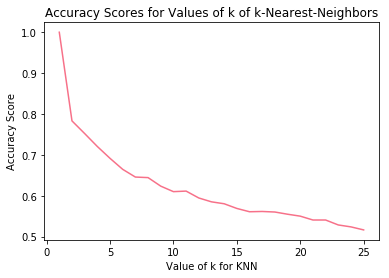

Time spent: 0.20745205879211426 seconds


In [35]:
# experimenting with different n values
# This initializes knn with diferente values predicts trains the model, predicts and analizes the results 
start = time.time()
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

end = time.time()
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

timeSpent = end - start

print('Time spent: {} seconds'.format(timeSpent))

In [22]:
############ This is responsible to initialize and tain the neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X_normalized = normalize(X, norm='l2')
nn = MLPClassifier(activation='relu',solver='adam', alpha=1e-5,max_iter=500, random_state=1,verbose=True)
x_train, x_test, y_train, y_test = train_test_split(X_normalized,y, test_size= 0.25, random_state=1)
nn.fit(x_train, y_train)

Iteration 1, loss = 2.33258534
Iteration 2, loss = 2.26413118
Iteration 3, loss = 2.19900989
Iteration 4, loss = 2.13765185
Iteration 5, loss = 2.07956541
Iteration 6, loss = 2.02531054
Iteration 7, loss = 1.97335455
Iteration 8, loss = 1.92740528
Iteration 9, loss = 1.88761823
Iteration 10, loss = 1.85295142
Iteration 11, loss = 1.82487279
Iteration 12, loss = 1.80211603
Iteration 13, loss = 1.78491488
Iteration 14, loss = 1.77056470
Iteration 15, loss = 1.76116885
Iteration 16, loss = 1.75339614
Iteration 17, loss = 1.74803381
Iteration 18, loss = 1.74377832
Iteration 19, loss = 1.74072855
Iteration 20, loss = 1.73817900
Iteration 21, loss = 1.73648283
Iteration 22, loss = 1.73460615
Iteration 23, loss = 1.73348860
Iteration 24, loss = 1.73222198
Iteration 25, loss = 1.73136974
Iteration 26, loss = 1.73041513
Iteration 27, loss = 1.72975152
Iteration 28, loss = 1.72900205
Iteration 29, loss = 1.72832996
Iteration 30, loss = 1.72782941
Iteration 31, loss = 1.72740483
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [37]:
######### Metric analise from the neural network train
from sklearn.metrics import accuracy_score
y_pred = nn.predict(x_test)
accuracy_score(y_test, y_pred)

0.3018867924528302

In [38]:
######## This is responsible to initialize and tain the support vector machine
from sklearn.svm import SVR
y = encode.fit_transform(df['Name'].astype(str))
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=1)
svr_reg = SVR(gamma=0.001, C=1.0, epsilon=0.2,verbose=True)
log = svr_reg.fit(x_train, y_train)
print(log)
y_pred = svr_reg.predict(x_test)

[LibSVM]SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)


In [39]:
#### Returns the mean accuracy on the given test data and labels.
####### In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
svr_reg.score(x_test, y_pred)

1.0